# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')

from IPython.display import display

# the rest is up to you!

In [2]:
try:
    with zipfile.ZipFile("readonly/images.zip", mode = 'r', allowZip64 = True) as file: # here enabling the 'Zip64'
            print('File size is compatible')
except zipfile.LargeZipFile:
        print('Error: File size if too large')  

File size is compatible


In [3]:
with zipfile.ZipFile("readonly/images.zip", 'r') as file:
    print(file.printdir())
    print('Extracting all files...')
    file.extractall()
    print('Done!') # check your directory of zip file to see the extracted files


File Name                                             Modified             Size
a-0.png                                        2019-01-06 14:44:26     21000053
a-1.png                                        2019-01-06 14:44:30     22598429
a-10.png                                       2019-01-06 14:45:14     18166003
a-11.png                                       2019-01-06 14:45:14      7458745
a-12.png                                       2019-01-06 14:45:16      2421677
a-13.png                                       2019-01-06 14:45:20     26822842
a-2.png                                        2019-01-06 14:44:34      3650049
a-3.png                                        2019-01-06 14:44:46     18646538
a-4.png                                        2019-01-06 14:44:48      3993918
a-5.png                                        2019-01-06 14:44:52     16686162
a-6.png                                        2019-01-06 14:44:58     41638883
a-7.png                                 

In [4]:
page_list = zipfile.ZipFile("readonly/images.zip").namelist()
page_list

['a-0.png',
 'a-1.png',
 'a-10.png',
 'a-11.png',
 'a-12.png',
 'a-13.png',
 'a-2.png',
 'a-3.png',
 'a-4.png',
 'a-5.png',
 'a-6.png',
 'a-7.png',
 'a-8.png',
 'a-9.png']

In [5]:
def get_boxes(img):
    '''The heavy liftyng of getting the boxes which presummably contain the faces of 
    the input image img'''  
    img = cv.imread(img)
    gray0 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return face_cascade.detectMultiScale(gray0,1.4)   

In [6]:
def get_pair(img):
    ''' It returns the  tuple containing the text of the input image img (in upper cases) and the 
    collage of faces, just in case there are faces in the image img. If no faces are found, 
    the second element of the tuple is the string "No faces found" '''
    im=Image.open(img)
    rawText = pytesseract.image_to_string(im).split()
    upperCaseWords = [x.upper() for x in rawText]  
    boxes = get_boxes(img)
    if len(boxes) >0 :
        boxes = boxes.tolist()
        nrow = 1+ len(boxes)//4
        contact_sheet= Image.new(im.mode, (150*4, nrow*150), color='red')
        counter = 0
        for box in boxes:
            face = im.resize((150,150), box = (box[0],box[1],box[0]+ box[2],box[1]+ box[3]))
            x, y = counter%4, counter//4
            contact_sheet.paste(face, box = (x*150,y*150))
            counter  = counter + 1 
        return   upperCaseWords, contact_sheet 
    else:
        return upperCaseWords,"No faces found" 

In [7]:
def task(kwd):
    keyword =kwd.upper()
    for page in page_list:
        text, contactSheet = get_pair(page)
        if keyword in text:
            print("Results found in {}".format(page))
            if contactSheet == "No faces found":
                print("No faces found in {}".format(page))
            else:
                display(contactSheet)
        else:
            print("No results found in {}".format(page))                

Results found in a-0.png


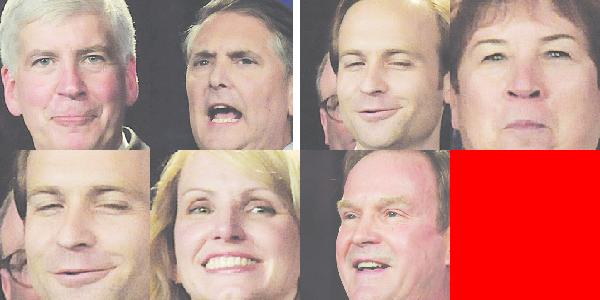

Results found in a-1.png


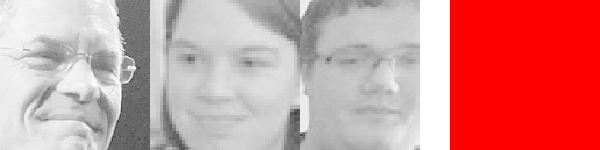

Results found in a-10.png


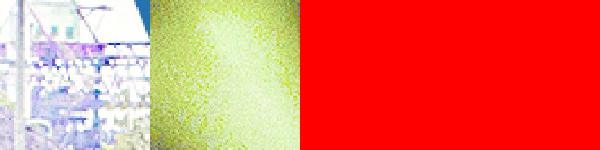

No results found in a-11.png
No results found in a-12.png
No results found in a-13.png
Results found in a-2.png


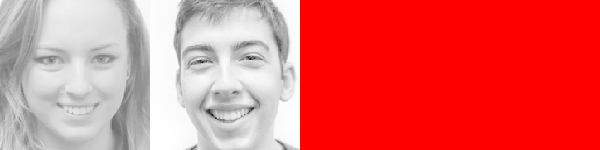

Results found in a-3.png


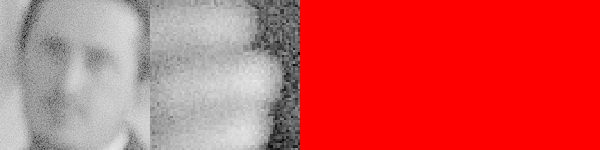

No results found in a-4.png


In [ ]:
task( "Mark")

My results are far from prefect. They  are  the best I could obtain without resourcing to cropping pictures in each page in order to isolate pictures from text. False positive and false negative are there (in task)  to be found....

The task procedure took about 25 minutes. 

## The following functions are exclusively for testing

In [ ]:
def getUpperCaseText(img):
    im=Image.open(img)
    rawText = pytesseract.image_to_string(im).split()
    return [x.upper() for x in rawText]     

In [ ]:
def get_contactSheet(img):
    im = Image.open(img)
    boxes = get_boxes(img)
    nrow = 1+ len(boxes)//4
    contact_sheet= Image.new(im.mode, (150*4, nrow*150), color='red')
    counter = 0
    for box in boxes:
        face = im.resize((150,150), box = (box[0],box[1],box[0]+ box[2],box[1]+ box[3]))
        x, y = counter%4, counter//4
        contact_sheet.paste(face, box = (x*150,y*150))
        counter  = counter + 1 
    return   contact_sheet 